
# Intro

In this post, I try to explain why quantum computers can be more powerful than classical. And I aim for an explanation "as simple as possible, but no simpler". This is not exactly trivial, because there is no precise classical analogy to quantum behavior. It was a paradigm shift, after all. Likely, all popular explanations you saw, like "it's exponentially large state space", or "it's entanglement", are incomplete at best. However, the math underlying basic quantum phenomena is pretty simple. Following it, you can see precisely how quantum things work, and perhaps build some intuition.

I will only rely on a minimal background in linear algebra, basic probability, and elementary complexity theory (understanding why an algorithm taking $\sqrt{N}$ steps is better than the one taking $N$ steps suffices). There are two points to address.

1. Why a classical computer can not efficiently reproduce, i.e. *simulate*, an arbitrary quantum computation?
2. Why some of these quantum computations solve useful problems?

To make quantum computing of general interest, you really need both.

Quantum computing is not really about physics. Rather, quantum mechanics can be understood as a variation of the probability theory. Standard probability theory deals with probabilities, which are positive numbers. Quantum mechanics instead deals with probability *amplitudes*. Probability amplitudes, when squared, give proper probabilities. But amplitudes can be both positive or negative (or even complex numbers, but this won't be important for us). In a sense, all quantum weirdness can be attributed to this seemingly superficial distinction.

There is more than one way to highlight the difference between classical and quantum. Comparing them head-to-head is tricky, simply because we usually use very different language to describe the two. Here, I will focus on comparing quantum mechanics with classical probability theory. Some features often perceived as unique to quantum systems, such as the exponentially large state space, are in fact present in probabilistic systems as well. Overall, it makes for a fairer apples-to-apples kind of comparison.

# Qubits, superposition, and amplitudes

Classical computers manipulate classical *bits*, i.e. systems that can be in one of two states, $0$ or $1$. Quantum computers manipulate quantum bits, or *qubits*. Similarly to a classical bit, a qubit can be in two states, denoted by $|0\rangle$ and $|1\rangle$. However, a qubit can also be in a state described by an (almost) arbitrary linear combination 

\begin{align}
|\psi\rangle = a_0 |0\rangle+a_1 |1\rangle  \ .
\end{align}

The states $|0\rangle$ and $|1\rangle$ should be thought of as two orthogonal two-dimensional vectors. For instance, in explicit computations one often sets $|0\rangle = \begin{pmatrix} 1 \\ 0\end{pmatrix}, |1\rangle = \begin{pmatrix} 0 \\ 1\end{pmatrix}$. Also, notation $|\cdot\rangle$ is nothing more than an unusual notation for a vector. We could have just denoted the states of a qubit by e.g. $\vec{v_0}$ and $\vec{v_1}$, but I'll keep the fancy Dirac notation.

In the quantum jargon, a linear combination of $|0\rangle$ and $|1\rangle$ is called a *superposition*. The superposition principle states that (almost) any vector in the state space, i.e. any linear combination of $|0\rangle$ and $|1\rangle$ is a valid state. The coefficients $a_0$ and $a_1$, called *amplitudes*, can be positive or negative. (They can even be complex numbers, but negative amplitudes are sufficient to summon the quantum magic.)

As I will explain in a bit, the only constraint on the amplitudes is $|a_0|^2+|a_1|^2=1$. In other words, the vector $|\psi\rangle$ needs to have a unit length. The states with real amplitudes can be nicely visualized as a point on a unit circle.

![](figs/state_circ.png){fig-align=center width=50%}

Amplitudes are simply projections of $|\psi\rangle$ on the corresponding axes: $a_0=\cos\theta, a_1=\sin\theta$.

(In general, amplitudes can be complex numbers. Then, a state of a qubit is a point on the [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere). But restricting to states with real amplitudes is simpler and sufficient for our goals.)

# Probabilistic interpretation of superposition

Alright, but what does it mean for a qubit to be in a superposition of $|0\rangle$ and $|1\rangle$? In many ways, it is similar to saying that there is some probability that the qubit is in state $|0\rangle$, and some probability it is in state $|1\rangle$. Yet, there are crucial differences between a superposition, and a classical probability distribution, that eventually lead to the quantum speedups.

Let's first discuss the similarities. Given a qubit in state $|\psi\rangle=a_0|0\rangle+a_1|1\rangle$, we can *measure* it. The measurement result is a simple definite state of the qubit, either $|0\rangle$ or $|1\rangle$. But the outcome is probabilistic. We get state $|0\rangle$ with probability $p_0=|a_0|^2$, and state $|1\rangle$ with probability $p_1=|a_1|^2$. Naturally, a valid quantum state must have $p_0+p_1=1$. Any two amplitudes $a_0$ and $a_1$ satisfying $|a_0|^2+|a_1|^2=1$ define a valid state of a qubit. 

If the only thing we do to state $|\psi\rangle=a_0|0\rangle+a_1|1\rangle$ is the measurement, then it is virtually indistinguishable from a probabilistic bit, which is $0$ with probability $p_0=|a_0|^2$ and $1$ with probability $p_1=|a_1|^2$.  

Before continuing, I need to make two technical remarks for later reference. Fist, note that as far as only the measurement results are concerned, all four states of the form $|\psi\rangle=\pm a_0|0\rangle\pm a_1|1\rangle$ are also indistinguishable (because they lead to identical probabilities of measurement outcomes). The relative sign of the amplitudes $a_0$ and $a_1$ may be important for other quantum processes, to be discussed later, but not for the measurement. Also, states $|\psi\rangle$ and $-|\psi\rangle$ are *always* indistinguishable, not only through measurement, but to any quantum process, and should be thought of as the same state.

# Quantum mechanics is a theory of amplitudes

Now for the differences between a superposition and a probability distribution. Quantum mechanics is fundamentally a theory of amplitudes. While amplitudes give rise to probabilities of measurement outcomes, the amplitudes are primary. Quantum computations, and more generally quantum processes, transform amplitudes. You can not reduce quantum amplitudes to the probabilities they represent. In this section, I will give a simple example illustrating the crucial difference.

## Quantum processes

Before going to the example, we need to discuss how quantum states change when we do something to them. A simple answer is as follows. Quantum states are vectors, and quantum processes linear transformations, or matrices, acting on these vectors. 

What kind of matrices? Well, a single-qubit state is a point on a circle, and any quantum process should map it to another point on this circle. And there are only two options: rotations and reflections. A general qubit rotation is represented by

\begin{align}
U = \begin{pmatrix}\cos\theta & \sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix} \ .
\end{align}

In Dirac's notation this is equivalent to 

\begin{align}
U|0\rangle = \cos\theta |0\rangle+\sin\theta |1\rangle,\quad U|1\rangle = -\sin\theta |0\rangle+\cos\theta |1\rangle \ .
\end{align}

As a reflection operator it is customary to choose

\begin{align}
Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix},\qquad \text{i.e.}\quad Z|0\rangle=|0\rangle, \quad Z|1\rangle=-|1\rangle \ .
\end{align}

Any single-qubit quantum process is equivalent to a combination of $U$ and $Z$. These processes are often called *quantum gates*, by analogy with classical logic gates. For instance, setting $\theta=\frac{\pi}{2}$ and multiplying by $Z$ we get

\begin{align}
ZU(\pi/2) = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \ ,
\end{align}
which is equivalent to the standard NOT gate, exchanging $|0\rangle$ and $|1\rangle$.

Though not strictly necessary for what follows, I'll try to motivate why quantum processes should be like that. That quantum processes must be rotations (or reflections, or, more generally, unitary transformations) of state vectors is a consequence of the following assumptions.

1. Quantum processes must be linear, meaning that $U\left(a_0|0\rangle+a_1|1\rangle\right)=a_0U|0\rangle+a_1U|1\rangle$.
2. They should preserve the length of the state vectors.
3. They must be reversible.

The assumption of linearity is very natural, and closely parallels the linearity of classical probability. Preserving the length of the state vector is necessary, because state vectors with non-unit length do not describe valid probability distributions.
The last assumption of reversibility is a bit more subtle to explain. I'd like to emphasize that it is more of a convenience, rather than a necessity.

In principle, all processes in the physical world are reversible, either quantum or classical. Irreversibility appears when we discard some information. For example, an operation that resets the bit to value 0, is irreversible, because it "forgets" the initial state of the bit. But you can reset the state of a qubit to $|0\rangle$ just as well, and that would be an irreversible operation. (Simply measure that state of the qubit, and if it turns out $|1\rangle$, apply NOT gate to it.)

For some reason, it is customary to use irreversible logic gates, such as AND or OR, in classical computing, but restrict to reversible logic gates in quantum computing. (In fact, it is possible to make any classical computation using reversible gates only.) My main point here is that this distinction is not fundamental.

## Bit flipping

Now we are ready to explain by example how transforming probability amplitudes is fundamentally different from transforming probabilities.

Let's call $F$ a procedure of taking a classical bit, and randomly flipping it. Say the bit was initially in $0$. After flipping, it is $0$ or $1$ with equal probability, i.e. $p_0=p_1=\frac12$. Let's apply $F$ once more, e.g. flip the bit the second time. This results in the following possibility tree.

![](figs/prob_tree.png){fig-align="center" width=70%}

There are two ways that the final state of the bit can turn out $1$. The first is that the bit transitioned $0\to 0 \to 1$ and the second is a through a sequence $0 \to 1 \to 1$. Each "history" or *trajectory* has probability $\frac14 =\frac12\times\frac12$, so that the total probability to find the bit in state $1$ after applying $F$ twice is $\frac12=\frac14+\frac14$.

## Qubit flipping

Here is a quantum version of this scenario. There is a process called the Hadamard gate, denoted by $H$, which acts as follows

\begin{align}
H|0\rangle = |+\rangle := \frac1{\sqrt{2}}\left(|0\rangle + |1\rangle\right), \quad H|1\rangle = |-\rangle := \frac1{\sqrt{2}}\left(|0\rangle - |1\rangle\right)  \ .
\end{align}

In words, $H$ takes state $|0\rangle$ to state $|+\rangle$, proportional to the sum of $|0\rangle$ and $|1\rangle$, and takes $|1\rangle$ to $|-\rangle$, the state proportional to their difference. The factors $\frac1{\sqrt{2}}$ ensure that amplitudes squared sum to one. Nota that $H$ gate is a rotation by angle $\theta=\frac{\pi}{4}$.

If we simply measure them, states $|+\rangle$ and $|-\rangle$ are indistinguishable from each other. Both yield $|0\rangle$ and $|1\rangle$ with equal probabilities $p_0=p_1=\frac12$. That's why I say that $H$ is similar to our classical bit-flipping operation $F$.

However, when applied twice, $H$ maps $|0\rangle$ back onto itself. Indeed
\begin{align}
H^2 |0\rangle=H \frac1{\sqrt{2}}\left(|0\rangle + |1\rangle\right) = \frac1{\sqrt{2}}\left(\frac{|0\rangle+|1\rangle}{\sqrt{2}}+\frac{|0\rangle-|1\rangle}{\sqrt{2}}\right)=|0\rangle \ .
\end{align}
There is *no chance* that the final state turns out $|1\rangle$.

Let's illustrate this graphically, using the same tree of possible trajectories.

![](figs/amp_tree.png){fig-align="center" width=70%}

Now the transitions are labeled by their amplitudes, instead of probabilities. As before, there are two ways to end up in state $|1\rangle$, one going through intermediate state $|0\rangle$, and one going through $|1\rangle$. The amplitudes of these trajectories, however, have opposite signs, $\frac12 = \frac1{\sqrt{2}}\times \frac1{\sqrt{2}}$ and $-\frac12=\frac1{\sqrt{2}}\times (-\frac1{\sqrt{2}})$, respectively. This makes the total amplitude, and hence the total probability, to end up in state $|1\rangle$ vanishing.

![](coins.png){fig-align="center" width=50%}

## Amplitudes can cancel, probabilities can't
This is *the key* difference between classical and quantum. For a classical probabilistic process, the probabilities of different trajectories sum up. In other words, if there are several possibilities to reach an end state, they reinforce each other. In a quantum process, it is the amplitudes that sum up, and they can *cancel* each other. The fact that there is some trajectory (with a non-zero amplitude) leading to some end state, does not mean that this end state is in fact reachable. The amplitude of this trajectory can be canceled by others. This is known as a *quantum interference*. (If you are familiar, this is what the famous [double-slit experiment](https://en.wikipedia.org/wiki/Double-slit_experiment) shows. Opening up a new slit for particles to pass through can *decrease* their chances of getting to a particular end point.)

Note that our choice to use $H$ gate in the example above is pretty arbitrary. It is simple and convenient, but almost any other quantum gate will lead to quantum interference, and that's what essential.

# Quantum states of multiple qubits

Before discussing why quantum interference can lead to quantum speedups, let's address one more question. A general state of three qubits can be written as

\begin{align}
|\psi\rangle = a_{000}|000\rangle + a_{001}|001\rangle+a_{010}|010\rangle+a_{011}|011\rangle+a_{100}|100\rangle + a_{101}|101\rangle+a_{110}|110\rangle+a_{111}|111\rangle \ .
\end{align}

Notation $|x_1x_2x_3\rangle \equiv |x_1\rangle |x_2\rangle |x_3\rangle$ is a shorthand for saying that the first qubit is in state $|x_1\rangle$, the second in state $|x_2\rangle$, and the third in state $|x_3\rangle$. The amplitudes here have the same meaning as for a single qubit. For instance, $|a_{101}|^2$ is the probability to find the first and third qubits in state $|1\rangle$, and the second qubit in state $|0\rangle$, upon measuring. For three qubits there are $8$ possible states, and $8$ amplitudes. For $n$ qubits, there are $2^n$ possible bitstrings and $2^n$ amplitudes (subject to the total probability equals one condition). This exponential dimension of the state space is often cited as *the origin* of the quantum speedups. Yet, it is only a part of the story.

Indeed, while the number of qubits $n$ is small enough, so that the dimension of the state space $2^n$ is manageable, any quantum process can be simulated classically. This is known as state-vector simulation, and it only requires being able to store and update a vector of dimension $2^n$ (currently, up to roughly $n=50$ qubits can be simulated by this brute-force approach.).

However, the mere exponential growth of the state space is not sufficient. We have the same growth in classical probabilistic description. Indeed, to specify the probability distribution over $n$ classical bits, one needs to provide $2^n$ probabilities corresponding to each possible bit string. For instance, to describe a probability distribution over three bits, one needs to specify eight probabilities $p_{000}$ through $p_{111}$.

# Why quantum interference defies classical simulation

Now we are ready to explain why some quantum computations can not be efficiently simulated by a classical computer. Imagine a quantum computer that manipulates $n$ qubits. It runs a quantum algorithm that outputs a quantum state. This particular algorithm produces a quantum state that is not a superposition, but a particular bitstring such as $|\psi\rangle=|00101\dots\rangle$. This bitstring *is* (or encodes) the solution to our problem. (Not all quantum algorithms are like that, but some are, to a good approximation.)

You should also think of a quantum algorithm as consisting of a number of simple quantum operations. (Say it is a sequence of $H$ and [Toffoli gates](https://en.wikipedia.org/wiki/Toffoli_gate), which are universal for quantum computation.) Mathematically, you can get the output state by taking the initial state, representing it as a vector, and applying matrices of various quantum gates constituting the algorithm to this vector. As discussed, this works for $n$ sufficiently small, but eventually breaks down because the memory required scales exponentially.

Let's imagine a similar scenario in a classical probabilistic world. Someone comes up with a classical probabilistic algorithm that produces a correct result with probability 1. In fact, directly simulating this algorithm by keeping track of the probabilities of different bitstrings at all steps may be equally intractable, because the number of possible bitstrings is exponentially large. But we do not need to do that. We know that the algorithm outputs the correct solution with probability one, i.e. the correct solution is reached by *all* trajectories having a non-zero probability. We simply need to simulate a *single* such trajectory, and see where it ends up. Classical probabilities don't cancel, they reinforce each other.

This does not work for quantum amplitudes. We can easily find a trajectory with a non-zero amplitude. But there is no guarantee that this trajectory leads to the correct end state, because its amplitude can get cancelled by other trajectories. Accounting for all possible trajectories, you can determine the true probability of reaching that particular end state. Of course, generally there are exponentially many trajectories, and this is not feasible. (Incidentally, this view gives a different simulation technique. Keeping track of the total state vector requires exponential memory, but is time-efficient. In contrast, the total amplitude for reaching a particular end state can be computed by summing trajectories one by one. This requires little memory, but an exponential number of steps.)

More generally, neither quantum nor classical probabilistic algorithms need to produce a definite bitsting. In general, different runs produce different results, corresponding to some probability distribution. In that case, the simulation should only be capable of producing individual outcomes, or *samples*, that are described by the same distribution. This is easy to achieve in the classical probabilistic case. We simply sample *one* trajectory at a time, period. Ultimately, this works because though we *describe* our system as if it could be in different states at the same time step, this only makes sense for different runs of the algorithm. During a single run, a classical system can really only be in a single state at a single time.

This does not work for quantum processes. Here, it does not suffice to sample one trajectory at a time, because different trajectories can interfere. In a sense, quantum systems can really be in several places at once.

# Why quantum interference leads to quantum speed ups

We saw how quantum interference is a hindrance to a classical simulation. But why is it useful? How can it lead to quantum speedups? 
Unfortunately, I can't give you a clear-cut explanation, but we can at least see how that works at examples. We will consider two quantum algorithms.


## Deutsch's algorithm

Deutsch's algorithm is one of the first and simplest, an archetypical quantum algorithm. It may look a bit fishy though, but we'll discuss that later. 

So you have a boolean function of a single bit $f(x)$ (i.e. $f$ takes 0 or 1 and returns 0 or 1). There are two mutually exclusive possibilities, either $f(0)=f(1)$, or $f(0) != f(1)$. In the first case, we call the function *balanced*. The goal is to find out whether $f$ is balanced.

Importantly, the function $f$ is a "black box" for us. We can only *query* this function, i.e. provide it with inputs and observe outputs. In complexity theory lingo we have *oracular access* to $f$, i.e. we can query it, but can't look inside.

How many queries to $f$ should we make to figure out if $f(0)$ is the same as $f(1)$? Right, two queries, one to find $f(0)$ and another to find $f(1)$, there is no other way. 

Turns out, we can solve the problem with a *single* query on a quantum computer. For this we need a quantum version of the oracle. The quantum oracle will be a matrix, denoted by $U_f$, that works as follows

\begin{align}
U_f|x\rangle = (-1)^{f(x)}|x\rangle \ ,
\end{align}

i.e. the oracle reverses the sign of a state $|x\rangle$ if $f(x)=1$. This definition might look a bit unnatural. A more obvious choice would be to say that the oracle acts by $\widetilde{U}_f|x\rangle = |f(x)\rangle$. The problem is, if $f(0)=f(1)$ this $\widetilde{U}_f$ is not reversible, which is a problem for a quantum computer. $U_f$, on the other hand, is always reversible. While this definition of $U_f$ may not be the first thing that comes to mind, it's really the simplest way to define a transformation that treats states with $f(x)=0$ and $f(x)=1$ differently, while being reversible.

Recall that $U_f$ is a linear operator, so it acts on a state in superposition as

\begin{align}
U_f\left(a_0 |0\rangle+a_1|1\rangle\right) = a_0 (-1)^{f(0)}|0\rangle+a_1 (-1)^{f(1)}|1\rangle \ .
\end{align}


We are done with preliminaries. Here is the Deutsh algorithm. Start with $|0\rangle$ and apply $H$ gate to it, to obtain $|+\rangle$. Then, apply the oracle to get

\begin{align}
U_fH|0\rangle = U_f |+\rangle = \frac1{\sqrt{2}}\left((-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle\right)
\end{align}

You see, this state sort of knows both $f(0)$ and $f(1)$. But this information can not be extracted directly. Simply measuring this state will give $|0\rangle$ or $|1\rangle$ with equal probabilities, and reveal nothing about $f$ whatsoever. The trick is to apply $H$ once again. With a little algebra, we find

\begin{align}
HU_fH|0\rangle = \frac12\left((-1)^{f(0)}+(-1)^{f(1)}\right)|0\rangle+\frac12\left((-1)^{f(0)}-(-1)^{f(1)}\right)|1\rangle \ .
\end{align}

This expression may look complicated, but is in fact trivial. For balanced functions only the first term survives, so that the final state is $|0\rangle$, while for unbalanced functions the first term disappears, leaving us with $|1\rangle$. (Formally, we can also get $-|0\rangle$ or $-|1\rangle$, but recall that $|\psi\rangle$ and $-|\psi\rangle$ are in fact the same states.) 

Hence, measuring the final state allows us to decide whether the function is balanced or not. And the final state is produced using *a single query* to the quantum oracle $U_f$. Note that the crucial part of the computation is quantum interference, the cancellation between different trajectories. For balanced functions, $U_f$ is equivalent to the identity, and the amplitude of getting $|1\rangle$ in the end state is vanishing (this is literally our qubit-flipping example, with $H$ gate applied twice). The twist is that for the unbalanced functions, the situation is opposite.

The Deutsch algorithm solves an artificial problem and has no applications. Hiding some trivial function $f$ (after all, there are only four one-bit boolean functions!) in a "black box" might look silly. However, the techniques used generalize to meaningful problems, one of which we consider next.

## Grover's algorithm

### Quantum search
*Grover's* algorithm is one of the oldest, most famous, and simplest to explain quantum algorithms. It is often described as a *quantum search*.

Suppose there is a problem with a very large yet finite number of potential solutions, and you know no better way to find the right one other than trying all available options one by one. An example often given is trying to find a name of a person in a phone book, only knowing the phone number. 

Mathematically, let $f$ be a boolean function of $n$ bits $f(x_1, \dots, x_n)$. The goal is to find an assignment of bits that makes $f(x_1,\dots, x_n)=1$. For simplicity, assume that such an assignment is unique, and call the corresponding solution $m=(x_1,\dots, x_n)$, $m$ for marked state.

In the standard setting of Grover's algorithm we only have oracular access to $f$, i.e. we can provide it with inputs and observe outputs. (We will move beyond oracles, eventually.) In that case, there is nothing better we can do except for trying all of $2^n$ possible bitstrings $(x_1,\dots, x_n)$ one by one, and see which one works. Let's denote the total number of bitstrings by $N=2^n$. On average, classical brute-force search takes $N/2$ queries to $f$. 

### Grover's oracle
Grover's algorithm allows solving this search problem with only $\sim \sqrt{N}$ queries to the quantum oracle, a quadratic speedup relative to the classical search. Recall that an oracle $U_m$ for state $|m\rangle$ is some linear operator that differentiates this state from the rest. There may be different yet equivalent ways to define such an oracle. Perhaps, the most convenient one is

\begin{align}
U_m|x\rangle = (-1)^{f(x)} |x\rangle  = \begin{cases} -|m\rangle,\quad x=m \\ {\,\,\,\,\,}|x\rangle,\quad else \end{cases} \ ,
\end{align}

i.e. the oracle that reverses the sign of the marked stated $|m\rangle$, and does nothing to the rest. To be sure, there is no quantum magic at this step, just a simple definition.

### The initial state
In the first step of Grover's algorithm (and in fact in many others) we prepare a state

\begin{align}
|s\rangle = \frac1{\sqrt{N}}\sum_x |x\rangle \ ,
\end{align}
which is a superposition of *all possible* bitstrings with equal amplitudes. Here are some examples. For $n=1$ state $|s\rangle$ is the same as state $|+\rangle$ we've met before. For $n=2$ we have $|s\rangle = \frac12\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle \right)$. 

State $|s\rangle$ may look complicated, but it is easy to prepare. Simply apply $H$ gate to all qubits initialized in $|0\rangle$. For instance, for $n=2$ we have $H|0\rangle H|0\rangle = \frac1{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\frac1{\sqrt{2}}\left(|0\rangle+|1\rangle\right)=\frac12\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle \right)=|s\rangle$.
There is a simple probabilistic analog of this state -- a state of $n$ classical bits with any bitstring configuration being equally likely. And this probabilistic version is equally simple to prepare, just flip *every* bit randomly. 

### Reflections 

Grover's oracle $U_m$ has a simple geometric interpretation. Acting on any state $|\psi\rangle$, it inverts its component along the marked state $|m\rangle$. This is nothing but a reflection with respect to the hyperplane orthogonal to $|m\rangle$. Thus, Grover's oracle is a reflection in state space.

The final ingredient to Grover's algorithm is a second reflection, around state $|s\rangle$, which we denote by $U_s$. I emphasize that $|s\rangle$ is a known state, which is easy to prepare. I will omit the details, but applying the corresponding reflection operator $U_s$ is straightforward and efficient.

### Two-dimensional subspace

A neat feature of the Grover algorithm is that although it formally operates in an exponentially large space, the state of a system never escapes a two-dimensional subspace spanned by vectors $|m\rangle$ and $|s\rangle$. Note that states $|m\rangle$ and $|s\rangle$ are not completely orthogonal, as $|s\rangle$ contains a small component along $|m\rangle$ with amplitude $\frac1{\sqrt{N}}$. It is convenient to define state $|s_\perp\rangle$, which is equal to $|s\rangle$ minus the component along $|m\rangle$, and normalized to have unit length

\begin{align}
|s_\perp\rangle = \sqrt{\frac{N}{N-1}}\left(|s\rangle - \frac{1}{\sqrt{N}}|m\rangle\right) \ .
\end{align}

Here is a sketch.

![](figs/states.png){fig-align="center" width=50%}

Note that the angle $\theta_0$ is such that $\sin\theta_0=\frac{1}{\sqrt{N}}$, a projection of $|s\rangle$ on $|m\rangle$. For large $N$, $\theta_0\approx \frac{1}{\sqrt{N}}$.


### Grover's algorithm is a sequence of small rotations
So here is how Grover's algorithm works. Start in state $|s\rangle$, and apply two reflections, first $U_m$, then $U_s$. A combination of two reflections is a rotation, and turns out this is a rotation *towards* the marked state $|m\rangle$. To find out the angle $\theta$ of this rotation, it is sufficient to track a single vector, say the initial state $|s\rangle$. 

![](figs/grover_seq.png){fig-align="center" width=100%}

At the first step we apply $U_m$ and inverse the horizontal component of $|s\rangle$. At the second step, we apply $U_s$, which inverses the component along $|s\rangle$. This leads to a vector pointing southwest. Recall that state $|\psi\rangle$ is the same as state $-|\psi\rangle$, so we can multiply the resulting state by $-1$, to compare more easily with the initial state $|s\rangle$. Please assure yourself that the angle $\theta$ between the final state $-U_s U_m |s\rangle$ and the initial state $|s\rangle$ is twice the original angle $\theta=2\theta_0$. For large $N$, we have $\theta\approx \frac{2}{\sqrt{N}}$.

That's it! A single iteration of Grover's algorithm rotates the initial state towards $|m\rangle$ by angle $\theta\approx \frac{2}{\sqrt{N}}$. To reach the marked state $|m\rangle$, we need to make the sequence of these small rotations that combine into a $\frac{\pi}{2}$ rotation, and the required number of iterations $k$, which are all identical, is (roughly)

\begin{align}
k = \frac{\pi}{2 \theta} = \frac{\pi \sqrt{N}}{4} \ .
\end{align}
You see the $\sqrt{N}$ dependence right there, and this is surely better asymptotically than any classical algorithm can do. (Incidentally, no quantum algorithm can beat $\sqrt{N}$ for unstructured search as well.)

Just to be sure, rotating some known state $|x\rangle$ towards another known state $|y\rangle$, by any angle, is trivial. The point of the Grover algorithm is that using the oracle, we can rotate towards the *unknown* state, yet only by a small angle at a time.


I glossed over many details here, such as explaining how to construct $U_s$, proving why $U_sU_m$ is a rotation in 2d subspace, finding the exact value of $k$ which has edge-cases, etc. However, these are merely technical details, and if you followed along, you now understand the main idea behind Grover's search.


### Infinitesimal quantum speedup
Let's now try to trace the speedup provided by Grover's algorithm to quantum interference. For this, I'll look at a single iteration alone, which already provides a kind of quantum speedup, similar to that of the Deutsch algorithm

Here is what I mean. Suppose you are only allowed to call the oracle once. How much does that increase your chances of finding the marked element? Classically, the best thing you can do is to call the oracle on a random input. If it turns out to be the solution, which happens with probability $\frac1N$, you are done. If not, which happens with probability $\frac{N-1}{N}$, you make a guess at some other of $N-1$ remaining bitstrings, which succeeds with probability $\frac{1}{N-1}$. The total probability of success is 

\begin{align}
p = \frac1{N}+\frac{N-1}{N}\frac1{N-1}= \frac{2}{N} \ .
\end{align}

This is basically equivalent to being able to guess twice. 

Now, using a single call to the quantum oracle is equivalent to making 9 classical guesses! Indeed, recall that we begin in a state $|s\rangle$, which contains every bitstring with amplitude $\frac{1}{\sqrt{N}}$. Measuring $|s\rangle$ directly results it probability $\frac{1}{N}$ of finding the marked state $m$, which is no better than a simple classical guess. However, after a single iteration of Grover's algorithm, the angle becomes $\theta_0+\theta=3\theta_0$, so that the amplitude of the marked state is $\sin{3\theta_0}\approx \frac{3}{\sqrt{N}}$, which means that measuring this state now has probability $\frac{9}{N}$ to reveal the marked state.


### Quantum interference

The "single-iteration quantum advantage" discussed above can be traced back to the quantum interference the same way we did before. Here is an illustration.

![](figs/grover_tree.png){fig-align="center" width=80%}

Alright, I'm not entirely sure these kinds of sketches are very useful at this point. I just wanted to emphasize that the same basic phenomenon that we have seen with quantum coin-flipping, and then with Deutsch's algorithm, is also at play here. After a single Grover iteration, there are two ways to reach an undesirable state $|s_\perp\rangle$, which have amplitudes with opposite signs. (One is $\cos\theta_0\cos\theta$, the other $-\sin\theta_0\sin\theta$, and the sum is $\cos(\theta_0+\theta)$.) This kind of mutual weakening of different ways to reach an undesirable outcome is simply not possible in classical physics.


### Beyond oracles

I promised to address the notion of the oracles, if you feel uncomfortable about them. Oracles are useful abstractions. Formulating Grover's search in terms of oracles, or black boxes, is convenient. We estimate the complexity of the algorithm by simply counting the number of queries to the oracle.

In a real problem (e.g. [3-SAT](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem) or [CircuitSAT](https://en.wikipedia.org/wiki/Circuit_satisfiability_problem)) function $f$ is likely to be given as some classical logical circuit. Because a quantum computer can do classical computations, it is merely a technical step to build the corresponding quantum operator. So equating a single call to the quantum oracle with a single call to the classical oracle is reasonable.

However, there is a catch with oracles. Given an actual function $f$, and not just a black-box access, it could be possible to find solutions classically faster than in $\sim N$ steps. Whether the quantum speedup persists for such problems might be a tricky question, and should be analyzed with care. For some problems, at least, Grover's search *does* provide an unconditional quantum speedup.

# FAQ

Instead of a conclusion, here is a FAQ. Alright, this is not a real FAQ, but rather a mix of some questions that I had, some questions I think you might have, and multiple tangents cut off from the main text.

## Oh my, who reads posts this long? Gimme TLDR.

You are right, nobody reads post this long. Here is a TLDR.

Quantum mechanics is a kind of probability theory. A quantum computation can be roughly thought of as a sequence of random events.
In contrast to the classical random processes though, where different possibilities to reach *the same* outcome can only reinforce each other (their probabilities sum up), in quantum mechanics different possibilities can *interfere*, they can negate each other. This is one way to argue why quantum processes can not be efficiently simulated classically, and the interference of undesirable outcomes is necessary for quantum speedups.

## Why didn't you say anything about electrons, superconductors, Schrödinger cats?

From a mathematical point of view, quantum mechanics is not at all about physics, it is about how probabilities, or rather amplitudes, transform. It is of course truly remarkable that the physical world is ultimately quantum, but you do not need to study any particular physical system to understand quantum computing, as long as you're not building quantum hardware.

## I thought quantum computers are powered by quantum entanglement!

It is not that clear. It is true that any quantum computation without (with little) entanglement can be efficiently simulated classically. On the other hand, there is a [very interesting](https://en.wikipedia.org/wiki/Gottesman%E2%80%93Knill_theorem) class of quantum algorithms that can be simulated efficiently despite generating tons of entanglement.

In general, surprisingly many quantum processes *can* be efficiently simulated classically. Often this happens because these processes only explore a tiny part of the exponentially large state space. If an algorithm produces no entanglement, it is easy to pinpoint this small part and navigate it classically. But just how special entanglement is in this respect is up to a debate, I think.


## What about classical interference?

You've said the key player is quantum interference, right? What about classical interference, like waves, you know?

It is actually a pretty valid question. For instance, Grover himself [considered](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.65.032319) a possible analog of the quantum search using classical oscillators. You can also read an interesting discussion on [stack exchange](https://physics.stackexchange.com/questions/732637/grovers-algorithm-using-wave-interference-for-computing).

The main difference with classical interference is the dimension of state space. In classical physics, it is roughly proportional to the number of degrees of freedom that you have. In quantum physics, it is the exponent of that. So, in the classical world, we can have both the interference (waves) and an exponentially large space (in probabilistic setting), but not at the same time. In quantum, they co-exist.

## What use is Grover's algorithm?

It's hard to say, really. As far as I know, nobody is waiting for a quantum computer specifically to do some unstructured search. I mean, theoretically this is a remarkable algorithm, but its practical use cases are not clear.

Also, Grover's algorithm only provides a quadratic speed-up over classical. Any quantum algorithm that is not exponentially better than a classical counterpart may actually never be useful in practice. Here is why.

## What about errors?

Qubits are very fragile and easy to disturb, error rates comparable to classically estimated values like $10^{-18}$ are unimaginable for qubits. There is a principled way to deal with this, quantum error correction. The problem is, you need *a lot* of resources to produce a single fault-tolerant qubit. Current estimates show that the full error correction can lead to $10^{10}$, ten *orders* difference between the speed of a quantum and a classical computer per elementary operation.

While this is "only" a constant factor, irrelevant for asymptotic performance, it may severely limit the practical usefulness of any quantum algorithm with sub-exponential speedup (see e.g. [here](https://arxiv.org/abs/2011.04149)). There is a cool concept of [galactic algorithms](https://en.wikipedia.org/wiki/Galactic_algorithm), and some quantum algorithms may end up there.

## Alright, what other quantum algorithms are there?

While there are tons of derivative quantum algorithms, the essential building blocks for them are only a few. Peter Shor himself wrote an essay at some point titled [“Why haven’t more quantum algorithms been found?"](https://doi.org/10.1145/602382.602408). The essay dates back to early 00', but arguably the only innovation since was the HHL algorithm for solving linear systems. 

So, roughly, there are these classes of algorithms.

1. Grover's search and its extensions.
1. Those using the quantum Fourier transform to find periodicity. The best known example is Shor's algorithm, allowing to factor integers in polynomial time.
1. Solving linear systems of equations, and performing other primitives of linear algebra.
1. Quantum simulation, using quantum computers to simulate other quantum systems (e.g. chemicals or materials).

Except for the Grover, all other promise exponential speedups, and should be feasible even when the cost of error correction is factored in.

## What is the killer app?

This one is difficult, I think we don't know yet. I argued about this in detail in [another post](https://idnm.github.io/blog/posts/what_to_do_with_a_quantum_computer/what_to_do_with_a_quantum_computer.html).

Briefly, here are some of the problems. 

1. We are not sure what to use Grover for, and it may not be feasible to run with error correction.
1. Factoring numbers efficiently and breaking RSA sounds cool, but has very limited practical use.
1. Quantum computers can efficiently implement linear algebra, e.g. solve linear systems, *if* we do not take into account the time necessary to load classical data to the quantum computer, and then read off the result. This limitation is [totally serious](https://scottaaronson.blog/?p=2196), and so far has not been addressed.

Generally, there is a kind of trade-off. If there is very little structure to the problem, quantum algorithms can only give modest speedups, like Grover's. Problems with a lot of structure are often efficiently solvable on a classical computer as well. Finding a sweet spot in between is really difficult. Shor's factoring algorithm is still the only end-to-end example of an exponential quantum speedup. 

Overall, right now quantum computing might be a "solution looking for a problem". Our best short-term shot may be at using quantum computers to simulate other quantum systems, e.g. for quantum chemistry computations.

## How long before quantum chatbots?

Totally unclear. Maybe there will be no quantum machine learning on classical data at all (see the previous question). There are some interesting proposals in this domain, but no clear established applications, even for future robust quantum computers.

## What else can I read?

![[source](https://www.smbc-comics.com/comic/the-talk-3)](attachment:image.png)

Here are some references you might find interesting.

- A [comic](https://www.smbc-comics.com/comic/the-talk-3) explaining some basics of quantum mechanics, co-authored by Scott Aaronson. Entertaining, and has *all* technical details 100% correct.
- A brief and very pedagogical intro to quantum computing from Michael Nielsen [quantum country](https://quantum.country/).
- While writing this post, I stumbled upon this talk [Quantum Computing for Computer Scientists](https://www.youtube.com/watch?v=F_Riqjdh2oM&t=2755s&ab_channel=MicrosoftResearch). I didn't watch it fully, but the outline looks like a very nice introduction to quantum computing, partly overlapping and partly complementing with my post.
- An intro to quantum computing by Veritasium, specifically addressing Shor's algorithm [How Quantum Computers Break The Internet... Starting Now](https://www.youtube.com/watch?v=-UrdExQW0cs&t=1002s&ab_channel=Veritasium).
- A game [quantum flytrap](https://lab.quantumflytrap.com/game). Among many quantum games out there, I especially liked this one, because it precisely simulates quantum behavior of photons. In fact, the game is built on top of a real optical table simulator.

Alright, that's it for this post. As usual, any feedback is appreciated!
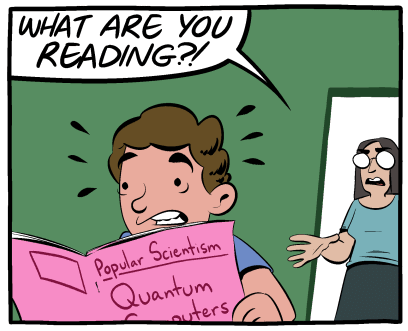